>Kapustin Yaromir  
20.09.2022  
ver 0.2

#### C использованием библиотек Numpy и Pandas написать программу реализующую:
- Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.

- Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).

- Подсчет длин предложений и их количества.

- Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".

- Построение гистограммы частоты встречаемости слов.

#### 1. Загрузка текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.

In [178]:
#за основу текстового файла взят материал https://longreads.com/2017/06/13/a-sociology-of-the-smartphone/
#Всего символов: 44916 Без пробелов: 37539 Количество слов: 7378 (https://text.ru/seo)

In [179]:
file = open("C:\\Users\\Yaromir\\Desktop\\article.txt", encoding='utf8')

In [180]:
#меняю символы разрыва строки на пробелы и все прописные буквы делаю строчными
text_string = file.read().replace('\n', '').lower()

#### 2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).

In [181]:
import spacy

nlp = spacy.load('en_core_web_sm') #загрузка модели языка пространства
sp_string = nlp(text_string) #создание документа пространства .doc

lemmas = []

#цикл проверяет не является ли слово в документе знаком пунктуации либо стоп-словом
#если условия соблюдаются, то слово подвергается лемматизации
for token in sp_string: 
    if not token.is_punct and not token.is_stop:
        lemmas.append(token.lemma_)

In [193]:
frequency = {} #создаю словарь подсчитывающий повторяемость каждого слова
for word in lemmas:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
unique_words = frequency.keys()
frequency_list = frequency.values()

#### 4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".

In [208]:
import pandas as pd #формирую датафрейм
df = pd.DataFrame({'Word': unique_words, 
                   'Frequency': frequency_list})

In [211]:
import matplotlib.pyplot as plt

top_df = df[df.Frequency >= 10] #топ слов по встречаемости
display(top_df)

,Word,Frequency
1,smartphone,50
8,object,10
12,everyday,16
13,life,16
19,thing,16
25,use,16
30,find,14
31,way,32
36,place,10
42,moment,10


#### 5. Построение гистограммы частоты встречаемости слов.

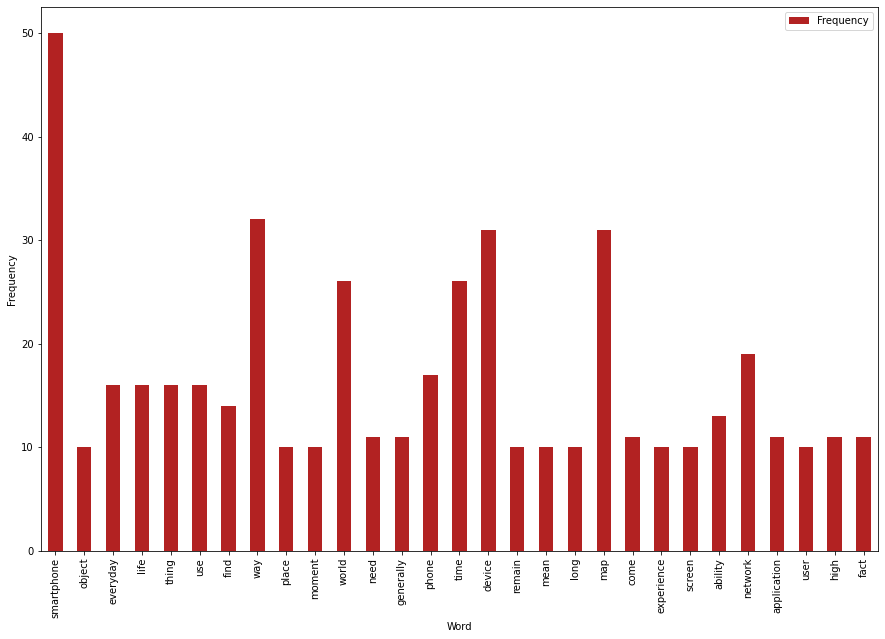

In [210]:
top_df.plot(x ='Word', y='Frequency', kind = 'bar', color = 'firebrick', figsize=(15, 10))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

#### 3. Подсчет длин предложений и их количества.

In [224]:
sent = [] 
length_sent = []

#цикл заполняет списки предложениями и количеством слов в них
for sentence in sp_string.sents:
    sent.append(sentence)
    length_sent.append(len(sentence))
    
df_sents = pd.DataFrame({'Sentence': sent, 
                   'Length': length_sent})

In [225]:
display(df_sents)

,Sentence,Length
0,"(﻿the, smartphone, is, the, signature, artifac...",10
1,"(less, than, a, decade, old, ,, this, protean,...",24
2,"(very, few, manufactured, objects, have, ever,...",42
3,"(we, use, them, to, meet, people, ,, to, commu...",21
4,"(we, buy, and, sell, things, with, them, .)",8
...,...,...
165,"(this, clever, hack, exploits, our, most, prim...",19
166,"(but, it, can, also, sensitize, us, to, the, t...",33
167,"(and, as, we, have, never, been, anything, but...",114
168,"(whatever, form, they, take, ,, those, institu...",32
